# Visualize GCN Learning Curves

In [2]:
import cPickle
import numpy as np
import time
from time import gmtime, strftime

import os
import sys

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 10)

import seaborn as sns
sns.set()

In [3]:
PATH = 'bin/2017-07-20-04:54:12//'
os.listdir(PATH)

['model.h5',
 'epochs.p',
 'epoch_lengths.p',
 'test_metrics.p',
 'train_metrics.p']

In [4]:
epochs = cPickle.load(open(PATH + 'epochs.p'))
epoch_lengths = cPickle.load(open(PATH + 'epoch_lengths.p'))
test_metrics = cPickle.load(open(PATH + 'test_metrics.p'))
train_metrics = cPickle.load(open(PATH + 'train_metrics.p'))
n_graphs = len(train_metrics[0])

In [19]:
# train_metrics[epoch_number][graph_number][iteration_number][loss, acc, val_loss, val_acc]
train_loss = [] # each sublist characterizes a graph
train_acc  = []
val_loss   = []
val_acc    = []

for graph in xrange(n_graphs):
    _train_loss = []
    _train_acc = []
    _val_loss = []
    _val_acc = []
    for epoch in xrange(epochs[-1] + 1):
        max_iter = len(train_metrics[epoch][0])
        for i in xrange(n_graphs):
            max_iter = max(max_iter, len(train_metrics[epoch][i]))

        for iteration in xrange(len(train_metrics[epoch][graph])):
            t_loss = train_metrics[epoch][graph][iteration][0]
            t_acc  = train_metrics[epoch][graph][iteration][1]
            v_loss = train_metrics[epoch][graph][iteration][2]
            v_acc  = train_metrics[epoch][graph][iteration][3]

            _train_loss.append(t_loss)
            _train_acc.append(t_acc)
            _val_loss.append(v_loss)
            _val_acc.append(v_acc)
        
        for iteration in range(len(train_metrics[epoch][graph]), max_iter):
            _train_loss.append(float('nan'))
            _train_acc.append(float('nan'))
            _val_loss.append(float('nan'))
            _val_acc.append(float('nan'))
        
    train_loss.append(_train_loss)
    train_acc.append(_train_acc)
    val_loss.append(_val_loss)
    val_acc.append(_val_acc)

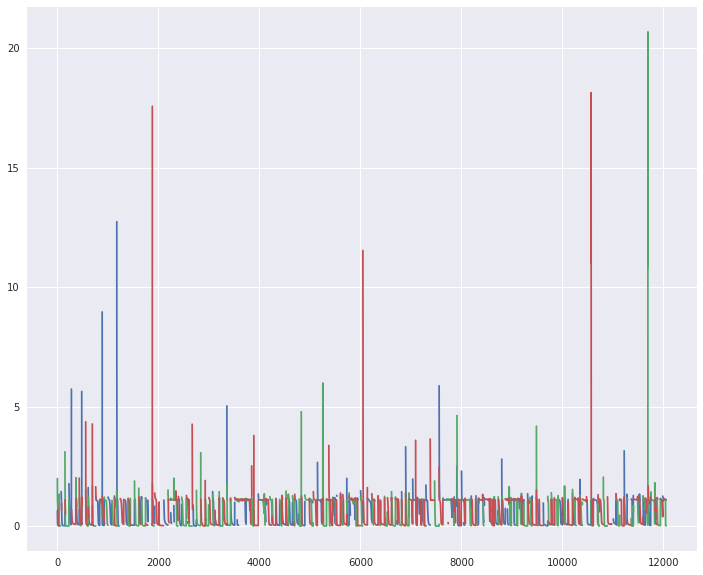

In [22]:
x = [i for i in range(0, len(train_loss[0]))]
plt.plot(x, train_loss[0])
plt.plot(x, train_loss[1])
plt.plot(x, train_loss[2])